22/11/2019

The code here is close to Nielsen. Each activation is treated as a column vector, even the last one which for XOR is just a simple number and is encloded in a shape (1,1) column vector of just one row, i.e if activation value of output neuron is a, then it is computed as np.array([[a]]).

Can easily adapt code here for the MLP excercises and the Iris classification problem.
But you may need to use more than 2 hidden neurons and more than 1 output neuron.

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
def sigm(z):
    return  1.0/(1.0 + np.exp(-z))

def sigm_deriv(z):
    a = sigm(z)
    return a*(1 - a)

In [70]:
class XOR_MLP:
    def __init__(self):
        self.train_inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
        self.train_outputs = np.array([0,1,1,0])
          
        np.random.seed(23)
        # hidden layer of 2 neurons
        self.w2 = np.random.randn(2,2)
        self.b2 = np.random.randn(2,1)
        
        # output layer has 1 neuron
        self.w3 = np.random.randn(1,2)
        self.b3 = np.random.randn(1,1)
        

    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)            
        return a3s

    
    def backprop(self, xs, ys):   # Assumed here that input vectors are rows in xs
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x,y in zip(xs,ys):               # for zip to work, each x in xs must be a row vector
            a1 = x.reshape(2,1)              # convert input row vector x into (2,1) column vector
            z2 = self.w2.dot(a1) + self.b2   # so will z2 and a2
            a2 = sigm(z2)                    # column vector shape (2,1)
            
            z3 = self.w3.dot(a2) + self.b3   # a simple number in a (1,1) column vector
            a3 = sigm(z3)                    # so is a3
            
            delta3 = (a3-y) * sigm_deriv(z3)                   # delta3.shape is (1,1)
           
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
        
           
            cost += ((a3 - y)**2).sum() 
        
        n = len(ys)  # number of training vectors    
        
        # get the average change per training input  
        # return the average adjustments to the biases and weights 
        # in each layer and the cost
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
        
    def train(self, epochs, eta):
        xs = self.train_inputs
        ys = self.train_outputs
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost
                
                
            
    

[[0.13441229 0.10816814 0.14522425 0.12453942]]
[[0.08467026 0.91859922 0.91853706 0.08963025]]


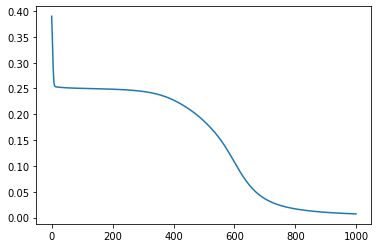

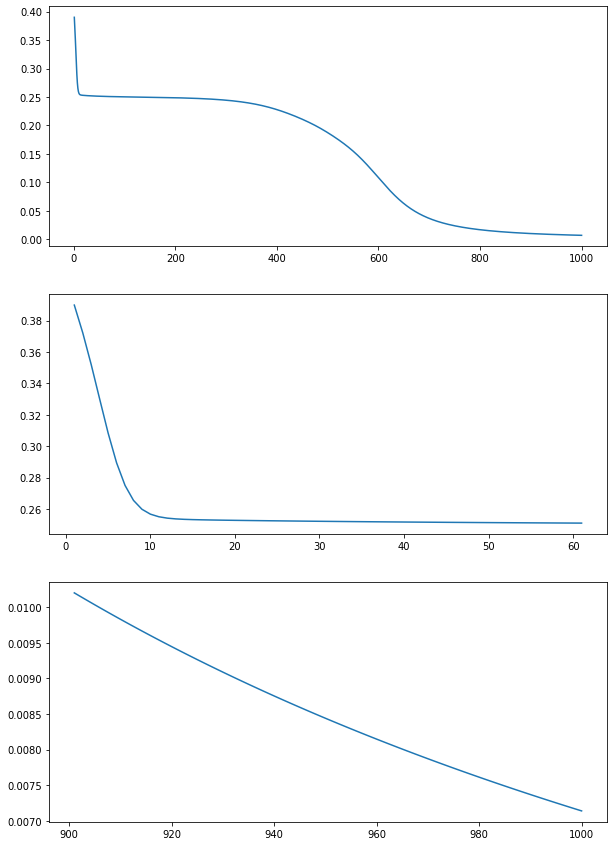

In [71]:
xor = XOR_MLP()
xs = xor.train_inputs.T

print(xor.feedforward(xs))

epochs = 1000
c = xor.train(epochs, 3.0)

print(xor.feedforward(xs))

x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(3,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)
plt.subplot(3,1,2)
plt.plot(x_axis[:61], c[:61])
plt.subplot(3,1,3)
plt.plot(x_axis[900:], c[900:])





Exercise 1: copy and adapt the above XOR_MLP code so that it uses 3 neurons in the hidden layer. Train such a MLP and see if it learns faster than the previous one.

In [72]:
# Exercise 1
class XOR_MLPv2:
    def __init__(self):
        self.train_inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
        self.train_outputs = np.array([0,1,1,0])
          
        np.random.seed(23)
        # hidden layer of 3 neurons
        self.w2 = np.random.randn(3,2)
        self.b2 = np.random.randn(3,1)
        
        # output layer has 1 neuron
        self.w3 = np.random.randn(1,3)
        self.b3 = np.random.randn(1,1)
        

    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)            
        return a3s

    
    def backprop(self, xs, ys):   # Assumed here that input vectors are rows in xs
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x,y in zip(xs,ys):               # for zip to work, each x in xs must be a row vector
            a1 = x.reshape(2,1)              # convert input row vector x into (2,1) column vector
            z2 = self.w2.dot(a1) + self.b2   # so will z2 and a2
            a2 = sigm(z2)                    # column vector shape (2,1)
            
            z3 = self.w3.dot(a2) + self.b3   # a simple number in a (1,1) column vector
            a3 = sigm(z3)                    # so is a3
            
            delta3 = (a3-y) * sigm_deriv(z3)                   # delta3.shape is (1,1)
           
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
        
           
            cost += ((a3 - y)**2).sum() 
        
        n = len(ys)  # number of training vectors    
        
        # get the average change per training input  
        # return the average adjustments to the biases and weights 
        # in each layer and the cost
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
        
    def train(self, epochs, eta):
        xs = self.train_inputs
        ys = self.train_outputs
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost
                
                
            
    

[[0.75101667 0.72275956 0.82197731 0.79600709]]
[[0.06170503 0.94737644 0.94695574 0.05410433]]


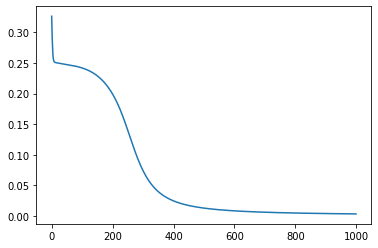

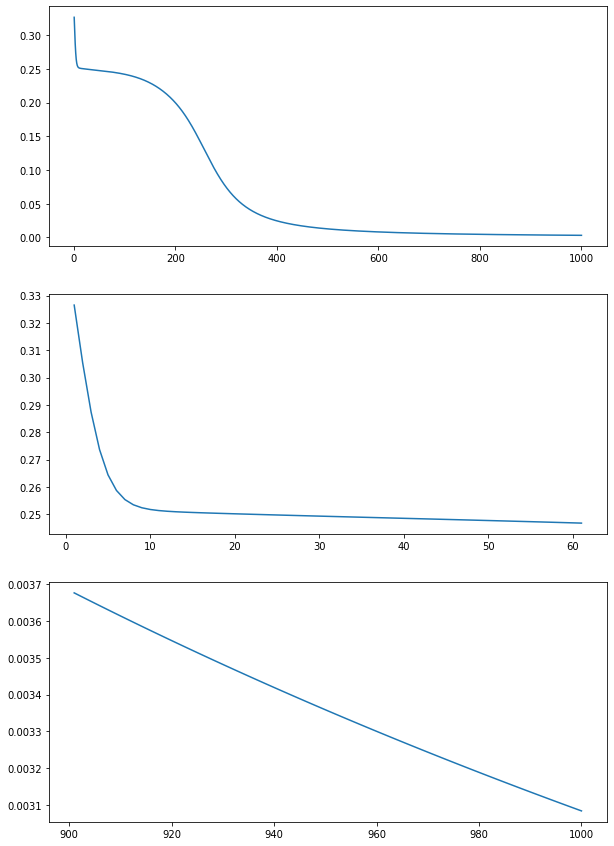

In [73]:
#Testing xor_mlpv2
xor2 = XOR_MLPv2()
xs = xor2.train_inputs.T

print(xor2.feedforward(xs))

epochs = 1000
c = xor2.train(epochs, 3.0)

print(xor2.feedforward(xs))

x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(3,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)
plt.subplot(3,1,2)
plt.plot(x_axis[:61], c[:61])
plt.subplot(3,1,3)
plt.plot(x_axis[900:], c[900:])


In [74]:
# A more general purpose MLP with m input neurons, n hidden neurons and o output neurond
# You must complete this code yourself
class MLP:
    def __init__(self, m, n, o):

        self.m = m
        self.n = n
        self.o = o
          
        np.random.seed(23)
        # hidden layer of N neurons
        self.w2 = np.random.randn(n,m)
        self.b2 = np.random.randn(n,1)
        
        # output layer has O neurons but code is incorrect
        # code here needs to be modified
        self.w3 = np.random.randn(o,n)
        self.b3 = np.random.randn(o,1)
        
        

    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)            
        return a3s

    
    def backprop(self, xs, ys):
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x, y in zip(xs,ys):            
            a1 = x.reshape(self.m, 1)        # convert input vector x into (2,1) column vector
            y = y.reshape(self.o, 1)         # convert output vector y into (1,1) column vector


            z2 = self.w2.dot(a1) + self.b2   # so will z2 and a2
            a2 = sigm(z2)                    # column vector shape (2,1)
            a2 = a2.reshape(self.n, 1)       # convert a2 into (2,1) column vector
            
            z3 = self.w3.dot(a2) + self.b3   # a simple number in a (1,1) column vector
            a3 = sigm(z3)                    # so is a3
            a3 = a3.reshape(self.o, 1)       # convert a3 into (1,1) column vector

            delta3 = (a3-y) * sigm_deriv(z3)                   # delta3.shape is (1,1)
           
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
        
           
            cost += ((a3 - y)**2).sum() 
        
        n = len(ys)  # number of training vectors    
        
        # get the average change per training input  
        # return the average adjustments to the biases and weights 
        # in each layer and the cost
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
    
    def predict(self, xs):
        return self.feedforward(xs)
        
    def train(self, epochs, eta):
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(self.train_inputs ,self.train_outputs)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        plt.ylabel('Cost')
        plt.xlabel('Epochs')
        return cost
                
         

In [75]:
# Are the outputs of these correct?
p1 = MLP(3,4,2)
print('\n W2 = \n',p1.w2, '\n W3 = \n', p1.w3, '\n')

p2 = MLP(4,6,3)
print('\n W2 = \n', p2.w2, '\nW3 = \n', p2.w3, '\n')



 W2 = 
 [[ 0.66698806  0.02581308 -0.77761941]
 [ 0.94863382  0.70167179 -1.05108156]
 [-0.36754812 -1.13745969 -1.32214752]
 [ 1.77225828 -0.34745899  0.67014016]] 
 W3 = 
 [[ 0.44173637  1.12887685 -1.83806777 -0.93876863]
 [-0.20184052  1.04537128  0.53816197  0.81211867]] 


 W2 = 
 [[ 0.66698806  0.02581308 -0.77761941  0.94863382]
 [ 0.70167179 -1.05108156 -0.36754812 -1.13745969]
 [-1.32214752  1.77225828 -0.34745899  0.67014016]
 [ 0.32227152  0.06034293 -1.04345    -1.00994188]
 [ 0.44173637  1.12887685 -1.83806777 -0.93876863]
 [-0.20184052  1.04537128  0.53816197  0.81211867]] 
W3 = 
 [[ 1.41531998  0.45771098  0.72887584  1.96843473 -0.54778801 -0.67941827]
 [-2.50623032  0.14696049  0.60619549 -0.02253889  0.01342226  0.93594489]
 [ 0.42062266  0.41161964 -0.07132392 -0.04543758  1.04088597 -0.09403473]] 



[[0.4321933  0.52195082 0.43163385 0.51250656]]
[[0.0090522  0.98045039 0.98137314 0.02446573]]


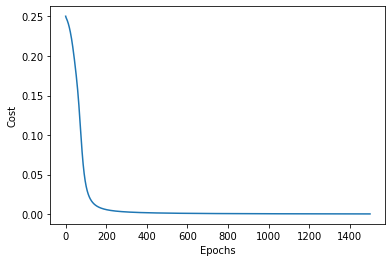

In [92]:
#Problem 1
#Testing MLP
prob1_mlp = MLP(3,4,1)
prob1_mlp.train_inputs = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]])
prob1_mlp.train_outputs = np.array([0,1,1,0])

xs = prob1_mlp.train_inputs.T

print(prob1_mlp.feedforward(xs))

#As mentoined in doc starting with 2000 epochs and changing learning rate as needed
epochs = 2000
learning_rate = 10.0

c = prob1_mlp.train(epochs, learning_rate)

print(prob1_mlp.feedforward(xs))